# Supervised Learning Project

# Project Topic

This project aims to predict the number of doctors visited by individuals aged 50 and older using a classification approach. Specifically, this is a supervised learning task, where classification algorithms (both Random Forest
and Logistic Regression) will be applied to categorize the survey respondents into different groups based on their number of doctor visits.

The goal of this project is to develop a classification model that predicts the number of doctors visited by individuals based on different health and demographic features. Understanding the doctor visiting pattern is critical for informing healthcare providers and policymakers. This model can be used to identify the factors that drive healthcare visits, which can help in improving
health outcomes and accessibility to medical care.

# Data


## National Poll on Healthy Aging (NPHA)
### https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)
Malani, Preeti N., Kullgren, Jeffrey, and Solway, Erica. National Poll on Healthy Aging (NPHA), [United States], April 2017. Inter-university Consortium for Political and Social Research [distributor], 2019-05-29. https://doi.org/10.3886/ICPSR37305.v1

### Dataset Information
For what purpose was the dataset created?

The National Poll on Healthy Aging dataset was created to gather insights on the health, healthcare, and health policy issues affecting Americans aged 50 and older. By focusing on the perspectives of older adults and their caregivers, the University of Michigan aimed to inform the public, healthcare providers, policymakers, and advocates about the various aspects of aging. This includes topics like health insurance, household composition, sleep issues, dental care, prescription medications, and caregiving, thereby providing a comprehensive understanding of the health-related needs and concerns of the older population.

Who funded the creation of the dataset?

The dataset was funded by AARP and Michigan Medicine, the University of Michigan's academic medical centre.

What do the instances in this dataset represent?

Each row represents a survey respondent.

Does the dataset contain data that might be considered sensitive in any way?

Yes. There is information about race/ethnicity, gender, age.

Was there any data preprocessing performed?

For this subset of the original NPHA dataset we chose 14 features related to health and sleep to use for the prediction task. We then removed all survey respondents with missing responses for any of the chosen features.

Has Missing Values?

No

## File Description
NPHA-doctor-visits.csv

22 KB

## Data Size
714 rows, 14 features


## Data Types of Features
14(all) categorical features


## Variables Table
| **Category**                               | **Label** | **Description**                               |
|--------------------------------------------|-----------|-----------------------------------------------|
| **Number of Doctors Visited**              | 1         | 0-1 doctors                                   |
|                                            | 2         | 2-3 doctors                                   |
|                                            | 3         | 4 or more doctors                             |
| **Age**                                    | 1         | 50-64                                         |
|                                            | 2         | 65-80                                         |
| **Physical Health**                        | -1        | Refused                                       |
|                                            | 1         | Excellent                                     |
|                                            | 2         | Very Good                                     |
|                                            | 3         | Good                                          |
|                                            | 4         | Fair                                          |
|                                            | 5         | Poor                                          |
| **Mental Health**                          | -1        | Refused                                       |
|                                            | 1         | Excellent                                     |
|                                            | 2         | Very Good                                     |
|                                            | 3         | Good                                          |
|                                            | 4         | Fair                                          |
|                                            | 5         | Poor                                          |
| **Dental Health**                          | -1        | Refused                                       |
|                                            | 1         | Excellent                                     |
|                                            | 2         | Very Good                                     |
|                                            | 3         | Good                                          |
|                                            | 4         | Fair                                          |
|                                            | 5         | Poor                                          |
| **Employment**                             | -1        | Refused                                       |
|                                            | 1         | Working full-time                             |
|                                            | 2         | Working part-time                             |
|                                            | 3         | Retired                                       |
|                                            | 4         | Not working at this time                      |
| **Stress Keeps Patient from Sleeping**     | 0         | No                                            |
|                                            | 1         | Yes                                           |
| **Medication Keeps Patient from Sleeping** | 0         | No                                            |
|                                            | 1         | Yes                                           |
| **Pain Keeps Patient from Sleeping**       | 0         | No                                            |
|                                            | 1         | Yes                                           |
| **Bathroom Needs Keeps Patient from Sleeping** | 0      | No                                            |
|                                            | 1         | Yes                                           |
| **Unknown Keeps Patient from Sleeping**    | 0         | No                                            |
|                                            | 1         | Yes                                           |
| **Trouble Sleeping**                       | 0         | No                                            |
|                                            | 1         | Yes                                           |
| **Prescription Sleep Medication**          | -1        | Refused                                       |
|                                            | 1         | Use regularly                                 |
|                                            | 2         | Use occasionally                              |
|                                            | 3         | Do not use                                    |
| **Race**                                   | -2        | Not asked                                     |
|                                            | -1        | Refused                                       |
|                                            | 1         | White, Non-Hispanic                           |
|                                            | 2         | Black, Non-Hispanic                           |
|                                            | 3         | Other, Non-Hispanic                           |
|                                            | 4         | Hispanic                                      |
|                                            | 5         | 2+ Races, Non-Hispanic                        |
| **Gender**                                 | -2        | Not asked                                     |
|                                            | -1        | Refused                                       |
|                                            | 1         | Male                                          |
|                                            | 2         | Female                                        |


# Data Cleaning & EDA


## Preliminary Check

In [189]:
import pandas as pd

# load data
df = pd.read_csv("NPHA-doctor-visits.csv")

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

After a preliminary examination of the dataset, I found that it has no incorrect data types, and there is currently no null data.

But I found there are some inconsistency problem
1. Misspelling of "Physical" and "Unknown".
2. In the "Dental Health" feature, I found a missing label "6" which corresponds to "N/A I have dentures," according to the original report. I will treat these as missing data.

In the next step, I will check for any imbalances in the data.

## Imbalance Check

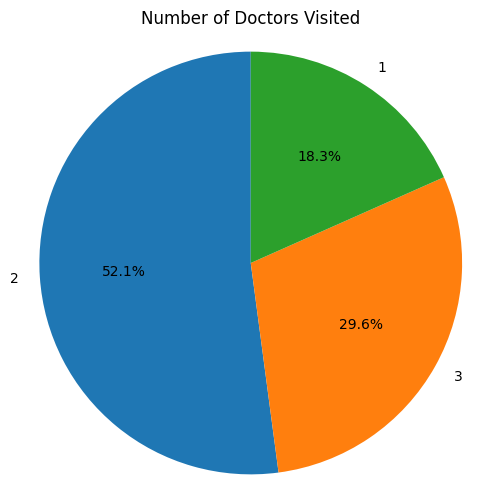

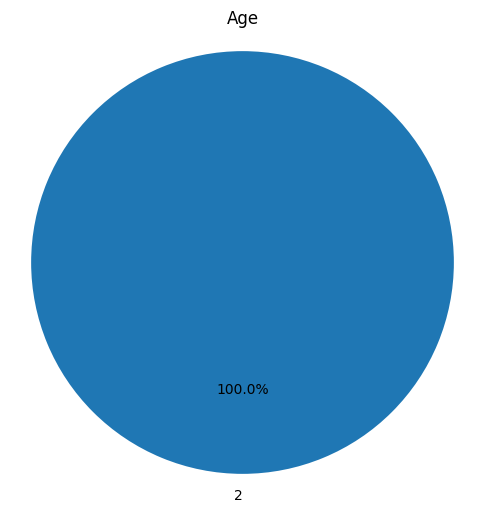

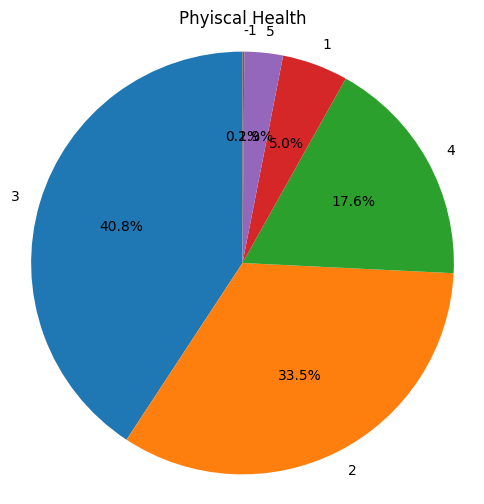

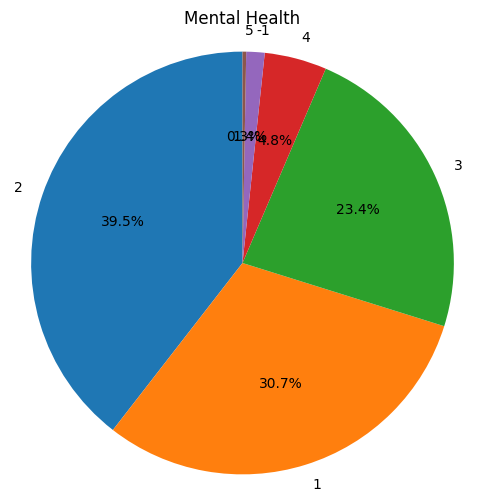

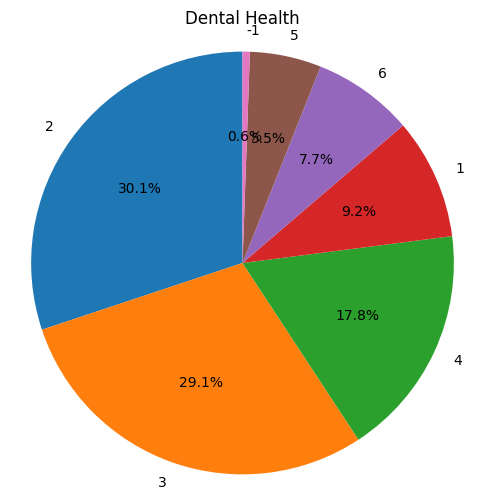

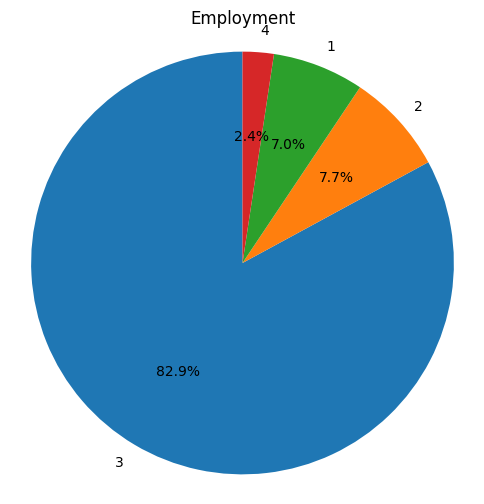

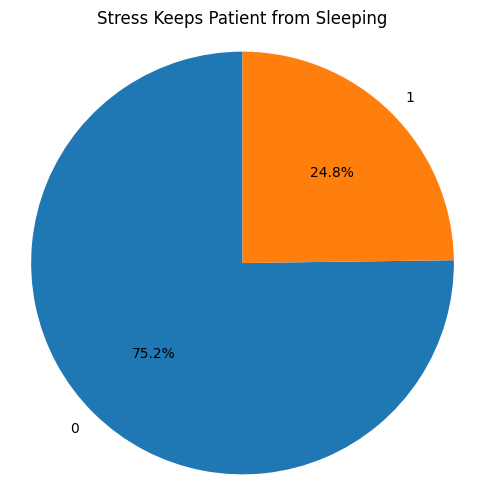

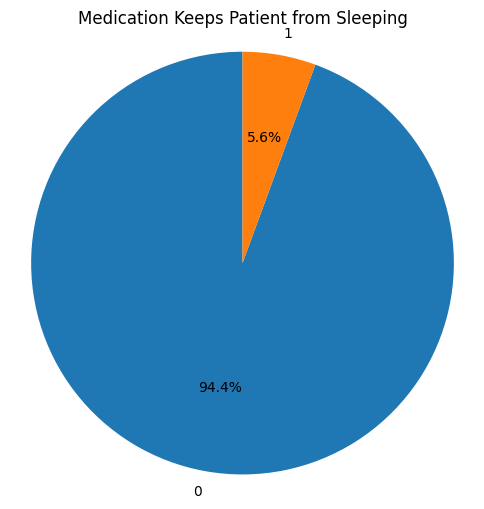

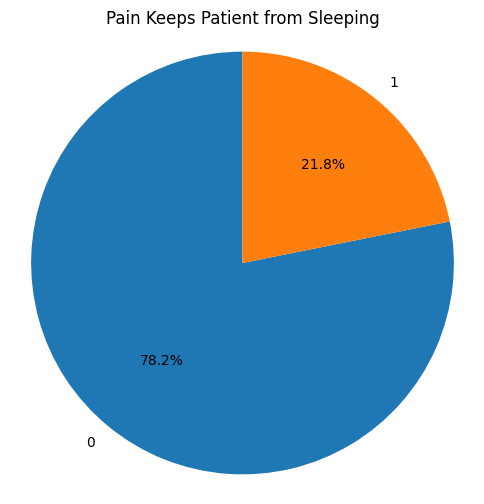

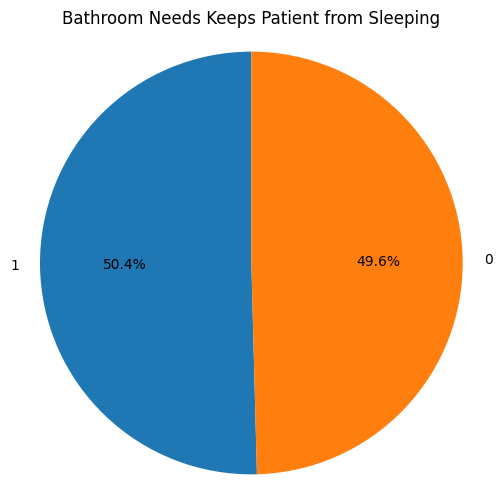

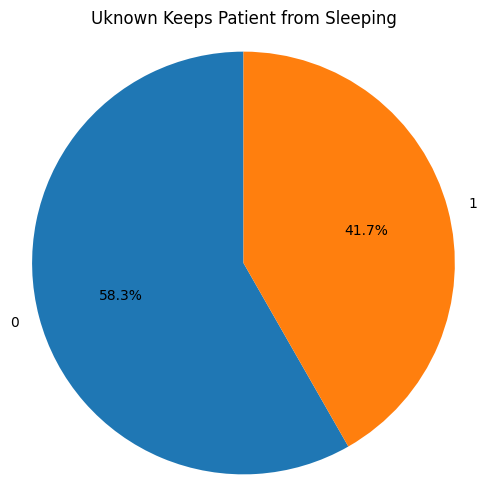

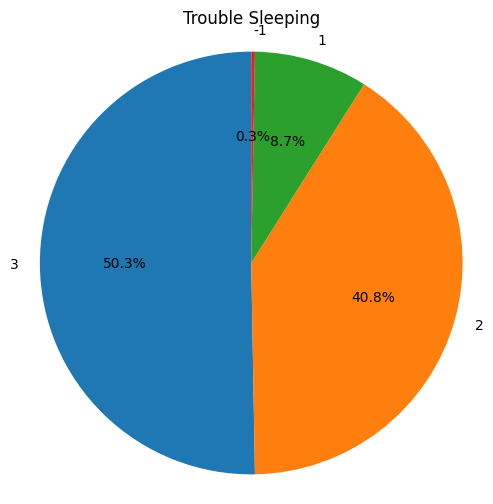

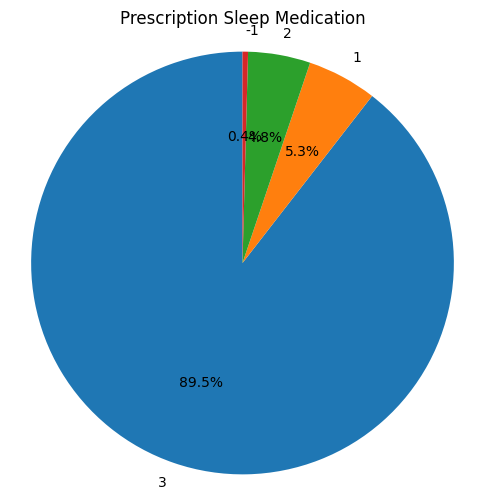

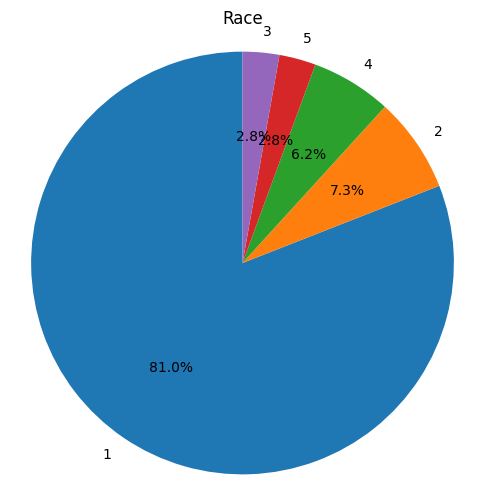

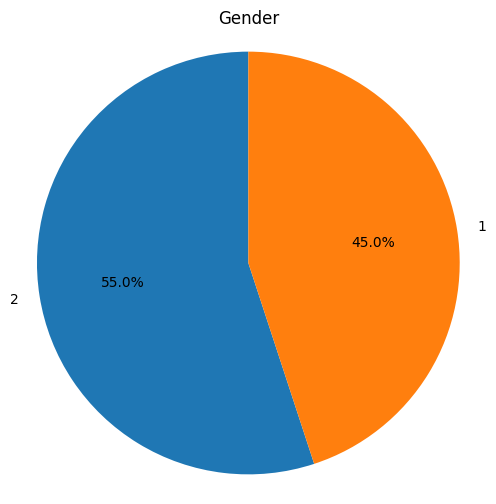

In [190]:
import matplotlib.pyplot as plt

imbalance_rel = {}

# count relatively
for column in df.columns:
    imbalance_rel[column] = df[column].value_counts(normalize=True)

#graph
for column in df.columns:
    plt.figure(figsize=(6, 6))
    plt.pie(imbalance_rel[column], labels=imbalance_rel[column].index, autopct='%1.1f%%', startangle=90)
    plt.title(column)
    plt.axis('equal')
    plt.show()

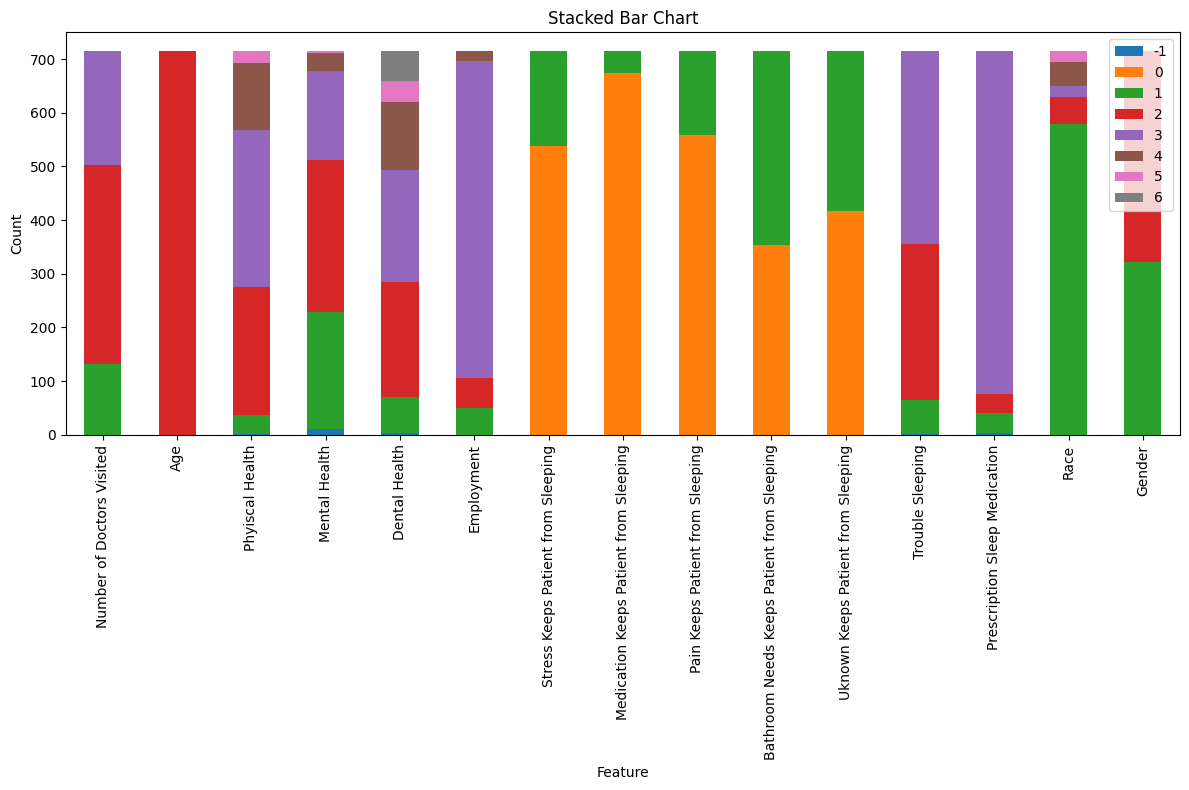

In [191]:
# count each catagory
stacked_data = df.apply(lambda x: x.value_counts()).T

#graph
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart')
plt.ylabel('Count')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

After conducting an imbalance check, I found that:

1. A very small portion of respondents chose -1 in several features, which indicates "refuse to answer." I will treat these as missing data and investigate any patterns before performing further manipulations.

2. In the "Age" feature, all responses are 2, so I can confidently remove this column because it provides no additional information.

3. There are nominal variables that need encodings before analysis. Because all of those variables are highly skewed (like "Prescription Sleep Medication" has 90% of option 3 and 1, 2 have only 5% each), I will combine smaller classes and make them binary variables.

## Missing Data Analysis

<Axes: >

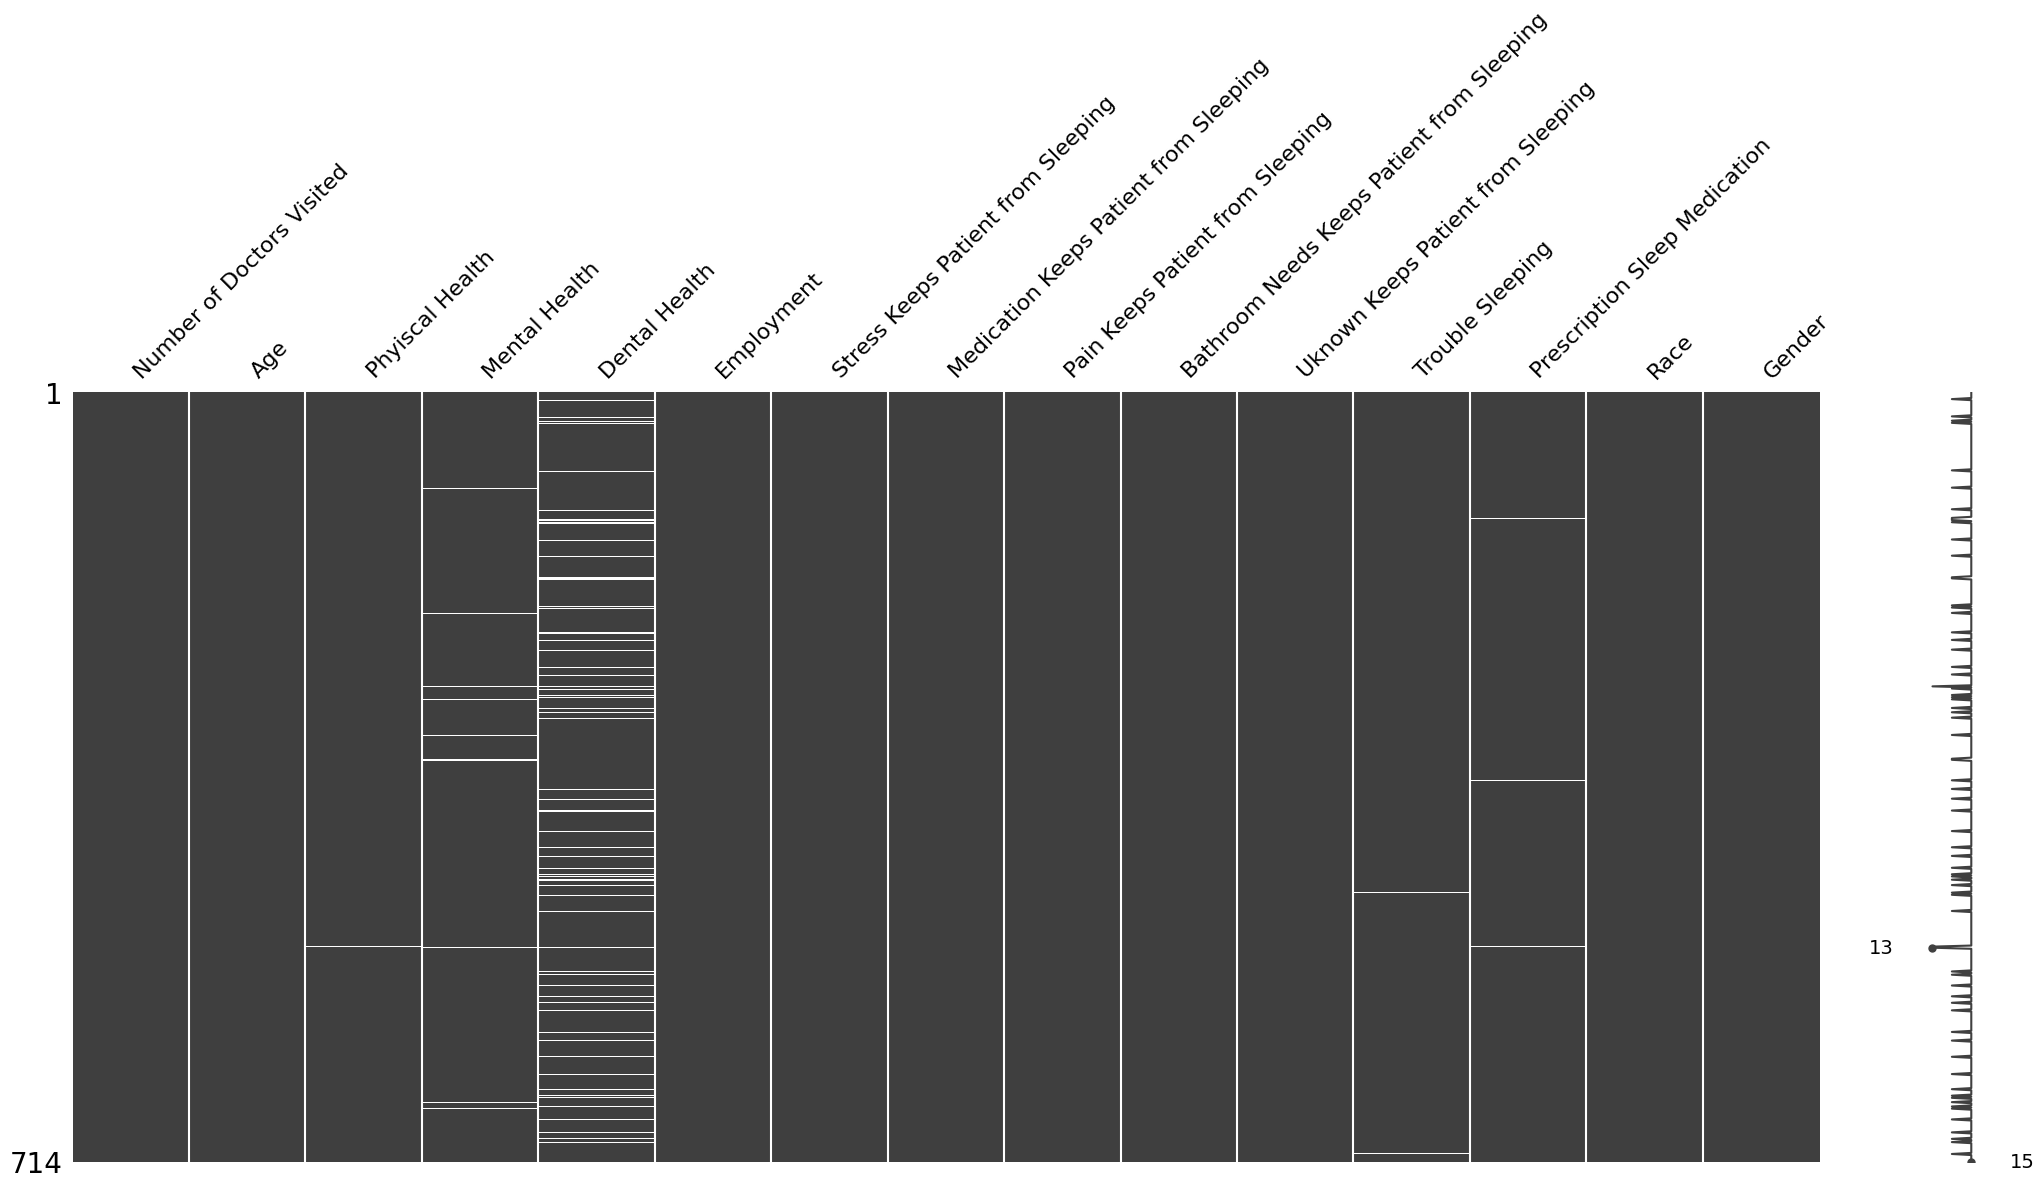

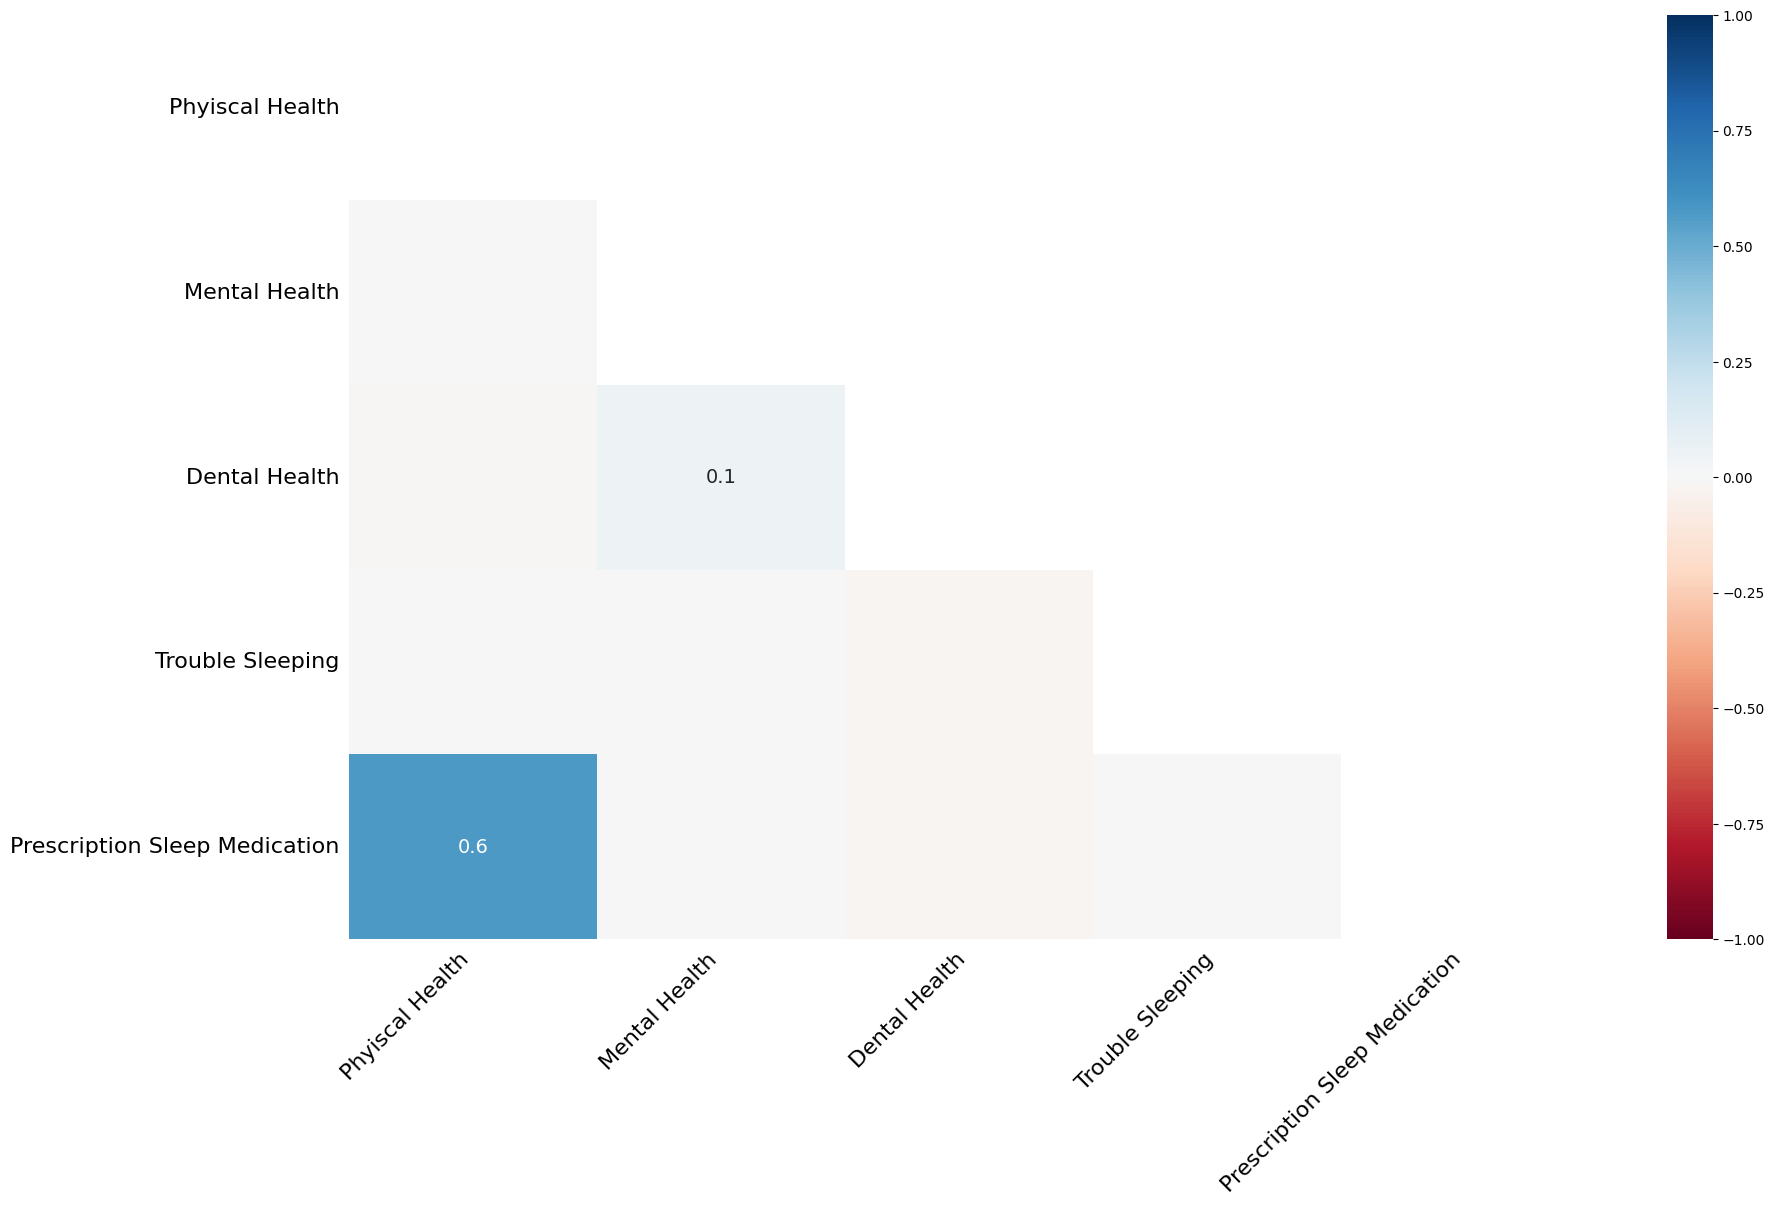

In [192]:
import numpy as np
import missingno as msno
for column in df.columns:
  df[column] = df[column].replace(-1, np.nan)

df["Dental Health"] = df["Dental Health"].replace(6, np.nan)
#graph
msno.matrix(df)
msno.heatmap(df)

After inspecting the missing data, I found no strong correlations between the features. Given that only a small portion of the data (approximately 1%, and Dental Health approximately 7%) is missing, imputing the missing values is unlikely to have a significant impact on the results.

I will impute mode instead of median because all variables are categorical.

## Performing Data Cleaning

Based on the discussions above, I have decided to proceed with renaming columns, imputing missing data, encoding nominal variables to binary, and removing uninformative features.

In [193]:
# 1. changing misspelling
df.rename(columns={'Phyiscal Health': 'Physical Health'}, inplace=True)
df.rename(columns={'Uknown Keeps Patient from Sleeping': 'Unknown Keeps Patient from Sleeping'}, inplace=True)

# 2. imputing missing data with mode
df = df.apply(lambda x: x.fillna(x.mode()[0]))

# 3. encoding nominal variables to binary
df['Employment'] = df['Employment'].apply(lambda x: 1 if x == 3 else 0)
df['Trouble Sleeping'] = df['Trouble Sleeping'].apply(lambda x: 1 if x == 3 else 0)
df['Prescription Sleep Medication'] = df['Prescription Sleep Medication'].apply(lambda x: 1 if x == 3 else 0)
df['Race'] = df['Race'].apply(lambda x: 1 if x == 1 else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 1 else 0)

# 4. recovering data type
df = df.astype(int)

# 5. removing Age column
df = df.drop(columns=['Age'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Physical Health                             714 non-null    int64
 2   Mental Health                               714 non-null    int64
 3   Dental Health                               714 non-null    int64
 4   Employment                                  714 non-null    int64
 5   Stress Keeps Patient from Sleeping          714 non-null    int64
 6   Medication Keeps Patient from Sleeping      714 non-null    int64
 7   Pain Keeps Patient from Sleeping            714 non-null    int64
 8   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 9   Unknown Keeps Patient from Sleeping         714 non-null    int64
 10  Trouble Sleeping                      

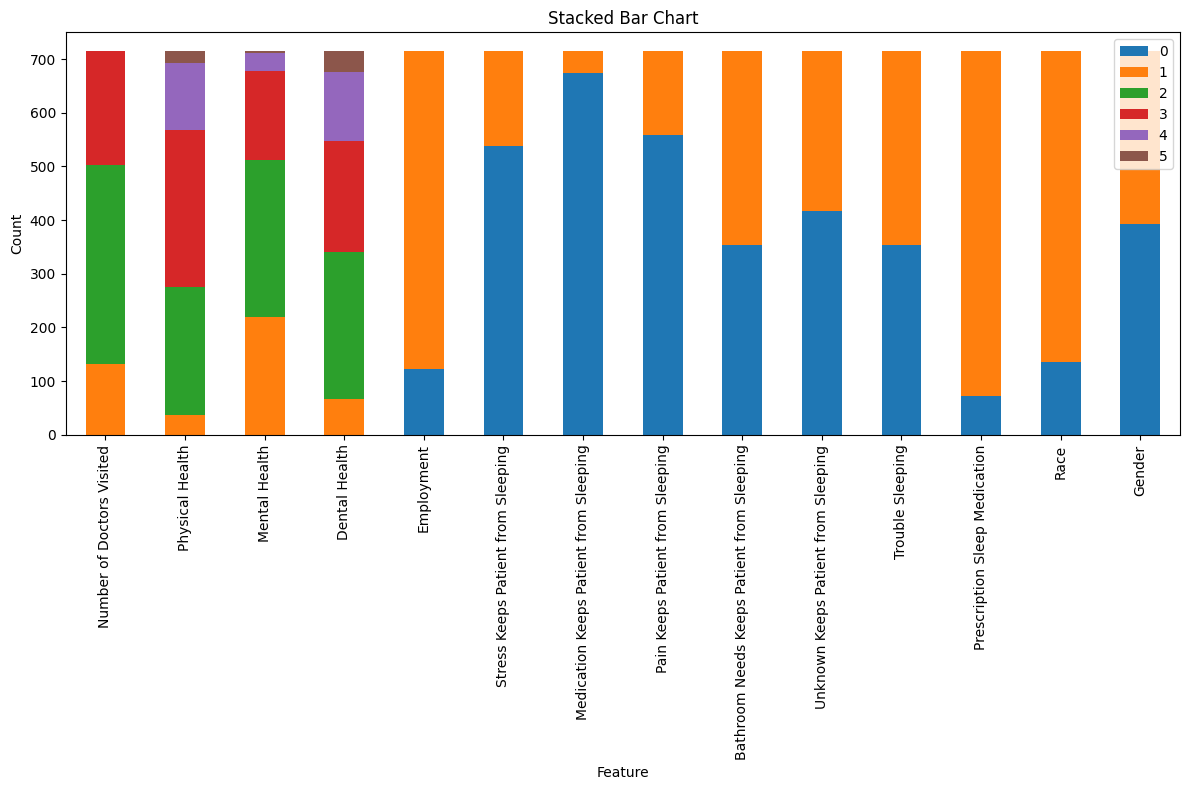

In [194]:
# count each catagory
stacked_data = df.apply(lambda x: x.value_counts()).T

#graph
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart')
plt.ylabel('Count')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Correlation Matrix

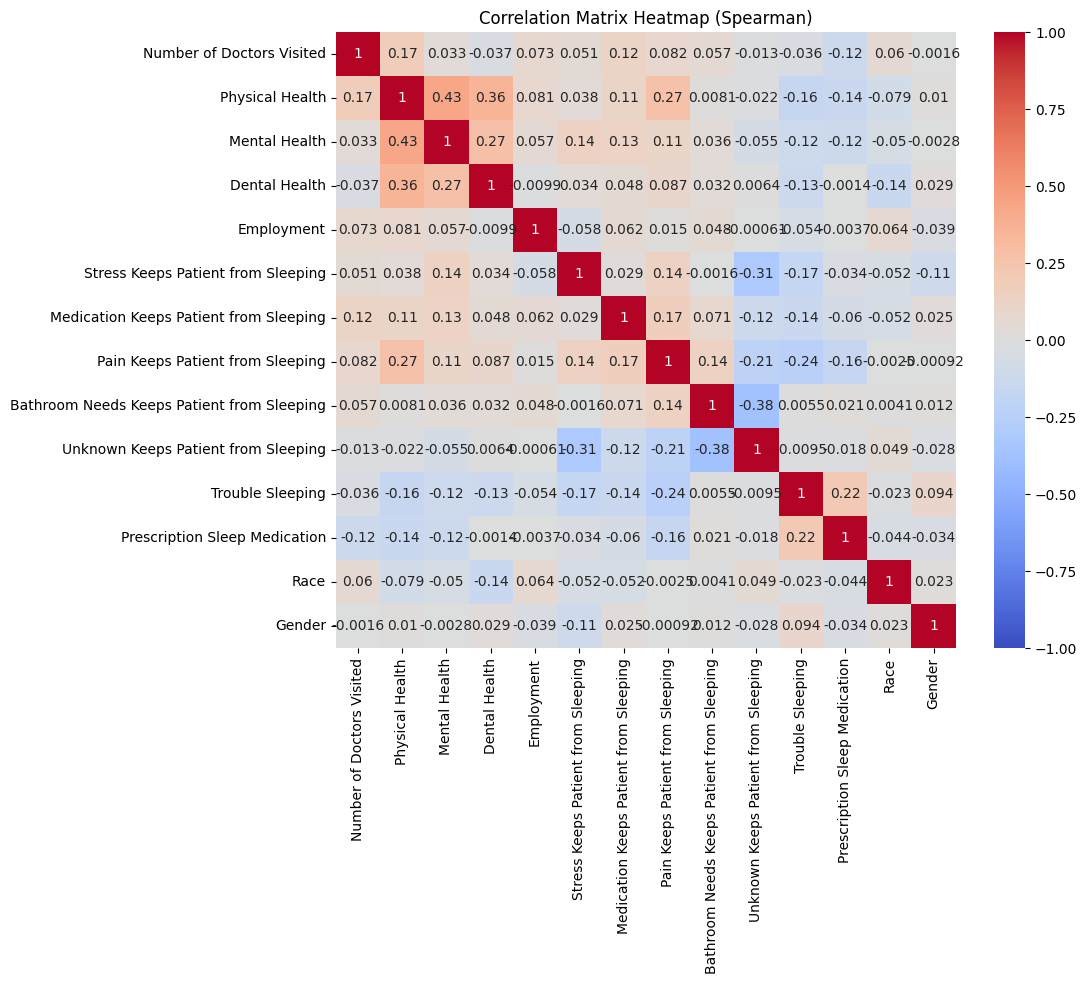

In [195]:
import seaborn as sns
# calculate spearman correlation matrix
corr_matrix = df.corr(method='spearman')

#graph
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap (Spearman)')
plt.show()

by spearman Correlation Matrix we can found that all features don't have strong monotonic correlation between target variable and other variables.

## Statistical Test

In [196]:
from scipy.stats import spearmanr
import pandas as pd

rst = {}

# calculate spearman correlation and p-value for each pair
for column in df.drop(columns=['Number of Doctors Visited']).columns:
  corr, p_value = spearmanr(df['Number of Doctors Visited'], df[column])
  rst[column] = {'Spearman Correlation': corr, 'p-value': p_value}

print(pd.DataFrame(rst).T)

                                            Spearman Correlation   p-value
Physical Health                                         0.174798  0.000003
Mental Health                                           0.033084  0.377393
Dental Health                                          -0.037314  0.319421
Employment                                              0.073073  0.050968
Stress Keeps Patient from Sleeping                      0.051174  0.171965
Medication Keeps Patient from Sleeping                  0.121129  0.001183
Pain Keeps Patient from Sleeping                        0.082314  0.027851
Bathroom Needs Keeps Patient from Sleeping              0.057118  0.127308
Unknown Keeps Patient from Sleeping                    -0.012959  0.729589
Trouble Sleeping                                       -0.036356  0.332013
Prescription Sleep Medication                          -0.122589  0.001030
Race                                                    0.060031  0.108998
Gender                   

by Statistical Test we found that Spearman Correlation of
1. Physical Health
2. Medication Keeps Patient from Sleeping
3. Pain Keeps Patient from Sleeping
4. Prescription Sleep Medication

are statistically significant

## Data Cleaning & EDA Conclusion

In this section, we first performed data description, using pie charts, bar graphs, and heat maps to visualize the dataset. We addressed missing data and accounted for skewness and nominal variables. Next, we examined the correlations between features and conducted statistical tests to evaluate their usefulness. Based on these analyses, forseen difficulties we learned are that we need to use a more robust model to deal with the skewness, and the low Spearman correlations suggest that non-monotonic models may be more appropriate.

# Models & Analysis

In this section, I will use different models and evaluation metrics, including accuracy and weighted f1-score, to analyze the performance of each model. Since the dataset involves multiclass classification and is skewed, the weighted F1-score is particularly important. I will summarize each results using tables and confusion matrices to provide a clear comparison of model performance.

## Random Forest Classifier

I will start with the Random Forest Classifier because it is a robust, decision-based model that may better address issues with imbalances and low correlations.

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# prepare the data
X = df.drop(columns=['Number of Doctors Visited'])
y = df['Number of Doctors Visited']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# predict
y_pred = rf_classifier.predict(X_test)

# evaluate
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score     support
1              0.222222  0.071429  0.108108   28.000000
2              0.542056  0.783784  0.640884   74.000000
3              0.444444  0.292683  0.352941   41.000000
accuracy       0.503497  0.503497  0.503497    0.503497
macro avg      0.402908  0.382632  0.367311  143.000000
weighted avg   0.451445  0.503497  0.454007  143.000000
[[ 2 21  5]
 [ 6 58 10]
 [ 1 28 12]]


Using a basic Random Forest Classifier, we achieved an accuracy of 0.503497 and a weighted F1-score of 0.454007. Next, I will try feature engineering and hyperparameter tuning to see if performance can be improved.

### Feature Engineering

I'll iteratively test every feature to maximize f1_score

In [198]:
import itertools
from sklearn.metrics import f1_score, confusion_matrix

# prepare the data
X = df.drop(columns=['Number of Doctors Visited'])
y = df['Number of Doctors Visited']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

features = X.columns
selected_features = []
global_max_f1_score = 0

for i in range(len(features)):
  max_f1_score = 0
  better_feature = ""
  for feature in features:
    # skip if chosen
    if feature in selected_features:
      continue
    # train
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train[selected_features+[feature]], y_train)
    # predict
    y_pred = rf_classifier.predict(X_test[selected_features+[feature]])
    f1 = f1_score(y_test, y_pred, average='weighted')
    # update max_f1
    if f1 > max_f1_score:
      max_f1_score = f1
      better_feature = feature
  # update global_max_f1
  if max_f1_score > global_max_f1_score:
    global_max_f1_score = max_f1_score
    selected_features.append(better_feature)
  # stop if global_max_f1 doesn't improve
  else:
    break
# train
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train[selected_features], y_train)

# predict
y_pred = rf_classifier.predict(X_test[selected_features])

# evaluate
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(selected_features)
print(report_df)
print(confusion_matrix(y_test, y_pred))

['Physical Health', 'Pain Keeps Patient from Sleeping', 'Employment', 'Dental Health', 'Race', 'Stress Keeps Patient from Sleeping']
              precision    recall  f1-score    support
1              0.454545  0.178571  0.256410   28.00000
2              0.561224  0.743243  0.639535   74.00000
3              0.382353  0.317073  0.346667   41.00000
accuracy       0.510490  0.510490  0.510490    0.51049
macro avg      0.466041  0.412963  0.414204  143.00000
weighted avg   0.489051  0.510490  0.480548  143.00000
[[ 5 19  4]
 [ 2 55 17]
 [ 4 24 13]]


After this feature choosing process, we found that using
1. 'Physical Health',
2. 'Pain Keeps Patient from Sleeping',
3. 'Employment', 'Dental Health',
4. 'Race',
5. 'Stress Keeps Patient from Sleeping'

improves accuracy from 0.503497 to  0.510490 and weighted-f1-score from 0.454007 to 0.480548

### Hyperparameter Tuning

I'll use GridSearchCV to find
1. n_estimators
2. max_depth
3. min_samples_leaf

and use 3-fold cross validation and f1-score to decide the best hyperparameters

In [202]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# prepare the data
X = df[['Physical Health', 'Pain Keeps Patient from Sleeping', 'Employment', 'Dental Health', 'Race', 'Stress Keeps Patient from Sleeping']]
y = df['Number of Doctors Visited']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': range(1, 10),
    'min_samples_leaf': range(1, 10),
}

# search hyperparameters
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, verbose=2, scoring='f1_weighted')


# train
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

# predict
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

# evaluate
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=300; total time=   0.7s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=300; total time=   0.7s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=300; total time=   0.5s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=500; total time=   0.7s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=500; total time=   0.7s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=500; total time=   0.7s
[CV] END ..max_depth=1, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=2, n_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


After hyperparameters tuning, I found 'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 100 are the best hyperparameters. Though it doesn't improve f1_score and accuracy, it has super high precision but low recall on guessing label 1.

## Ordinal Logistic Regression

I found that Ordinal Logistic Regression could be useful because 'Number of Doctors Visited' is an ordinal variable. Unlike in pure classification, its values have meaningful order, which should be accounted for in the analysis.

In [203]:
!pip install mord
from sklearn.model_selection import train_test_split
from mord import OrdinalRidge


# prepare the data
X = df.drop(columns=['Number of Doctors Visited'])
y = df['Number of Doctors Visited']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train
ordinal_model = OrdinalRidge()
ordinal_model.fit(X_train, y_train)

# predict
y_pred = ordinal_model.predict(X_test)
# evaluate
report = classification_report(y_test, y_pred.round(), output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score     support
1              0.000000  0.000000  0.000000   28.000000
2              0.541353  0.972973  0.695652   74.000000
3              0.700000  0.170732  0.274510   41.000000
accuracy       0.552448  0.552448  0.552448    0.552448
macro avg      0.413784  0.381235  0.323387  143.000000
weighted avg   0.480840  0.552448  0.438693  143.000000
[[ 0 27  1]
 [ 0 72  2]
 [ 0 34  7]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Comparing the basic Random Forest Classifier with Ordinal Logistic Regression, I observed that the f1-score slightly decreased from 0.454007 to 0.438693, while accuracy improved from 0.503497 to 0.552448. The key difference I noticed is that in Ordinal Logistic Regression, the model ignores label 1, which is the least frequent label in the dataset, allowing it to achieve higher accuracy on the other labels.

## Result Table

|attempt|accuracy|f1-score|
|----|----|----|
|Random Forest Classifier(basic)|0.503497|0.454007|
|Ordinal Logistic Regression(basic)|0.552448|0.438693|
|Random Forest Classifier(feature engineering)|0.510490|0.480548|
|Random Forest Classifier(feature engineering & hyperparameter tuning)|0.510490|0.444281|

# Discussion and Conclusion


I find this project both challenging and a great learning experience, especially since it's my first time cleaning and analyzing a categorical dataset. One key takeaway for me is that human survey data tends to be subjective and often includes a significant number of "refuse to answer" responses. This adds extra complexity to the data cleaning process, and it may lead to prediction results that are less accurate than expected.

During this project, I also realized that using nominal categorical variables as ordinal ones doesn't work well. This is why I combined some classes during the data cleaning stage. Ordinal variables contain meaningful information that can improve the model's performance, while nominal variables don't.

To improve the results, I think we should collect more samples, as the dataset currently has only about 700 samples. Additionally, incorporating more objective features, like wealth, could provide better insights. On the other hand, I believe we need to explore more complex models to capture the nuances of human behavior, as it is inherently complex.